In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
%matplotlib inline
import math
from sklearn.metrics import mean_squared_error
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('datatraining.txt')

In [3]:
df

,date,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
1,2015-02-04 17:51:00,23.18,27.2720,426.0,721.250000,0.004793,1
2,2015-02-04 17:51:59,23.15,27.2675,429.5,714.000000,0.004783,1
3,2015-02-04 17:53:00,23.15,27.2450,426.0,713.500000,0.004779,1
4,2015-02-04 17:54:00,23.15,27.2000,426.0,708.250000,0.004772,1
5,2015-02-04 17:55:00,23.10,27.2000,426.0,704.500000,0.004757,1
...,...,...,...,...,...,...,...
8139,2015-02-10 09:29:00,21.05,36.0975,433.0,787.250000,0.005579,1
8140,2015-02-10 09:29:59,21.05,35.9950,433.0,789.500000,0.005563,1
8141,2015-02-10 09:30:59,21.10,36.0950,433.0,798.500000,0.005596,1
8142,2015-02-10 09:32:00,21.10,36.2600,433.0,820.333333,0.005621,1


In [5]:
#We have developed our classifer to work without Humidity,so we drop the Humidity column.
#Also for time series prediction per se ,our concern at present only lies in forecasting the weather conditions,upon which we run our classication model,so we drop Occupancy

In [4]:
df.drop(['Humidity','Occupancy'],axis=1,inplace=True)

In [5]:
df.head()

,date,Temperature,Light,CO2,HumidityRatio
1,2015-02-04 17:51:00,23.18,426.0,721.25,0.004793
2,2015-02-04 17:51:59,23.15,429.5,714.00,0.004783
3,2015-02-04 17:53:00,23.15,426.0,713.50,0.004779
4,2015-02-04 17:54:00,23.15,426.0,708.25,0.004772
5,2015-02-04 17:55:00,23.10,426.0,704.50,0.004757


In [8]:
#As our forecasting is Time Dependent we parse the date column

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8143 entries, 1 to 8143
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           8143 non-null   object 
 1   Temperature    8143 non-null   float64
 2   Light          8143 non-null   float64
 3   CO2            8143 non-null   float64
 4   HumidityRatio  8143 non-null   float64
dtypes: float64(4), object(1)
memory usage: 381.7+ KB


In [7]:
df['date']=pd.to_datetime(df['date'],format='%Y-%m-%d %H:%M:%S')

In [8]:
df.index=df['date']
df.drop('date',axis=1,inplace=True)

In [9]:
df.head()

,Temperature,Light,CO2,HumidityRatio
date,,,,
2015-02-04 17:51:00,23.18,426.0,721.25,0.004793
2015-02-04 17:51:59,23.15,429.5,714.00,0.004783
2015-02-04 17:53:00,23.15,426.0,713.50,0.004779
2015-02-04 17:54:00,23.15,426.0,708.25,0.004772
2015-02-04 17:55:00,23.10,426.0,704.50,0.004757


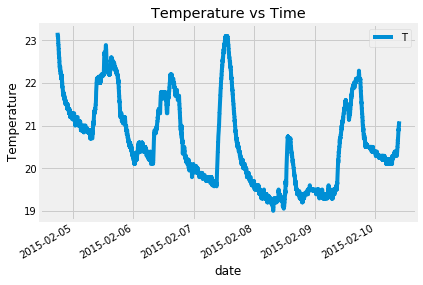

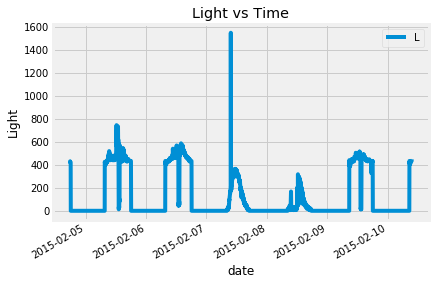

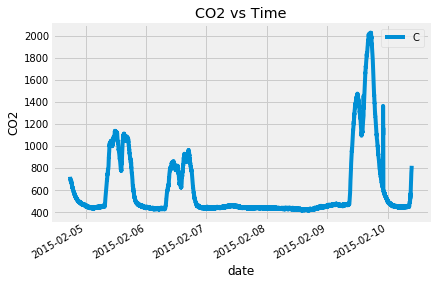

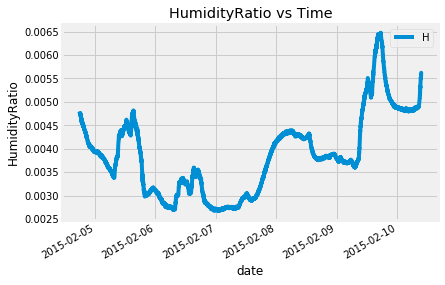

In [10]:
for i in df.columns:
    plt.title("{} vs Time".format(i))
    plt.xlabel("Time")
    df[i].iloc[:].plot(label=i)
    plt.ylabel(i)
    plt.legend(i)
    plt.show()

In [11]:
#Checking Stationarity
from statsmodels.tsa.vector_ar.vecm import coint_johansen

In [12]:
coint_johansen(df,-1,1).eig

array([5.37746967e-02, 6.77139092e-04, 5.46120999e-04, 3.91269612e-05])

In [16]:
#All the values are less than 1,hence we can go ahead

In [17]:
#Creating Train,Test Split
#using 80:20 ratio

In [13]:
train=df[:int(0.8*(len(df)))]
test=df[int(0.8*(len(df))):]

In [19]:
len(test)

1629

In [14]:
from statsmodels.tsa.vector_ar.var_model import VAR

In [15]:
AIC={}
best_aic,best_order=np.inf,0
for i in range(1,50):
    model = VAR(endog=train)
    model_result = model.fit(maxlags=i)
    AIC[i]=model_result.aic
    
    if AIC[i]<best_aic:
        best_aic=AIC[i]
        best_order=i
print('BEST ORDER', best_order, 'BEST AIC:', best_aic)        
# make prediction on validation
#prediction = model_fit.forecast(model_fit.y, steps=len(test))

/home/asg/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/home/asg/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/home/asg/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/home/asg/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency i

/home/asg/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/home/asg/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/home/asg/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/home/asg/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency i

BEST ORDER 28 BEST AIC: -21.427919804396485


/home/asg/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/home/asg/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


In [19]:
model=VAR(endog=train)
model_result=model.fit(maxlags=28)
prediction=model_result.forecast(model_result.y,steps=len(test))

/home/asg/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


In [20]:
prediction

array([[1.93931636e+01, 4.42032692e+00, 4.58682757e+02, 3.66859828e-03],
       [1.93901641e+01, 5.76570007e+00, 4.59922102e+02, 3.66497716e-03],
       [1.93915548e+01, 4.72199497e+00, 4.59700448e+02, 3.66347683e-03],
       ...,
       [2.03784531e+01, 1.06885497e+02, 5.33780097e+02, 3.60242225e-03],
       [2.03785454e+01, 1.06892024e+02, 5.33782485e+02, 3.60233276e-03],
       [2.03786376e+01, 1.06898554e+02, 5.33784879e+02, 3.60224332e-03]])

In [23]:
#Converting the predition to dataframe

In [21]:
pred=pd.DataFrame(index=range(0,len(test)),columns=df.columns)
for j in range(0,len(df.columns)):
    for i in range(0,len(prediction)):
        pred.iloc[i][j]=prediction[i][j]

In [22]:
pred

,Temperature,Light,CO2,HumidityRatio
0,19.3932,4.42033,458.683,0.0036686
1,19.3902,5.7657,459.922,0.00366498
2,19.3916,4.72199,459.7,0.00366348
3,19.387,6.37538,459.189,0.00366051
4,19.3897,8.27998,459.543,0.0036584
...,...,...,...,...
1624,20.3783,106.872,533.775,0.0036026
1625,20.3784,106.879,533.778,0.00360251
1626,20.3785,106.885,533.78,0.00360242
1627,20.3785,106.892,533.782,0.00360233


In [23]:
#check rmse
for i in df.columns:
    print('rmse value for',i,'is:',np.sqrt(mean_squared_error(pred[i],test[i])))

rmse value for Temperature is: 0.9558801894438647
rmse value for Light is: 230.79164729330128
rmse value for CO2 is: 630.0373603973716
rmse value for HumidityRatio is: 0.0015340245660501657


In [24]:
pred.to_csv('pred_final.txt')

In [27]:
pred

,Temperature,Light,CO2,HumidityRatio
0,19.3932,4.42033,458.683,0.0036686
1,19.3902,5.7657,459.922,0.00366498
2,19.3916,4.72199,459.7,0.00366348
3,19.387,6.37538,459.189,0.00366051
4,19.3897,8.27998,459.543,0.0036584
...,...,...,...,...
1624,20.3783,106.872,533.775,0.0036026
1625,20.3784,106.879,533.778,0.00360251
1626,20.3785,106.885,533.78,0.00360242
1627,20.3785,106.892,533.782,0.00360233
